<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/R_Image_Processing_naip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data
# #Training
# # #Labels
# # #Images
# #Validation
# # #Labels
# # #Images

In [1]:
install.packages(c('raster','sf','fasterize'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’




In [2]:
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp3MBPf9/remotes1031f3e3d30/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/Rtmp3MBPf9/file103791847e9/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [4]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
# library(gdalUtils)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift




In [61]:
install.packages("terra")
library(terra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

terra 1.7.71


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=7babd43ae5a5aaa22f7bd99598017599&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIRDBiRkwtUWZxQzZnYWNBaWxrZWJLUTNtOFowQmNoMmRyV05sa1M1dE80c1FjSklydENIdWxBbE4zWWZUMUJfQSIsInN0YXRlIjoiN2JhYmQ0M2FlNWE1YWFhMjJmN2JkOTk1OTgwMTc1OTkifQ==


In [7]:
dir.create('hawaii_data')

In [9]:
# https://drive.google.com/file/d/1qNqsskgMOSzMQ-2LdDaGulDXUjpaI3Jr/view?usp=drive_link
drive_download(file = as_id('1qNqsskgMOSzMQ-2LdDaGulDXUjpaI3Jr'), path =  '/content/hawaii_data/nwi_wetlands_hawaii.gpkg', overwrite = TRUE)
nwi_hawaii_gpkg = st_read('/content/hawaii_data/nwi_wetlands_hawaii.gpkg')
nwi_hawaii_gpkg

File downloaded:

• nwi_wetlands_hawaii.gpkg <id: 1qNqsskgMOSzMQ-2LdDaGulDXUjpaI3Jr>

Saved locally as:

• /content/hawaii_data/nwi_wetlands_hawaii.gpkg



Reading layer `nwi_wetlands_hawaii' from data source 
  `/content/hawaii_data/nwi_wetlands_hawaii.gpkg' using driver `GPKG'
Simple feature collection with 2105 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 173408.4 ymin: 2087445 xmax: 316047.8 ymax: 2249339
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
1,PUBHh,0.2609826,Freshwater Pond,1056.1591,121.4864,MULTIPOLYGON (((230022.7 21...
2,PUBHh,0.3178072,Freshwater Pond,1286.1200,129.4962,MULTIPOLYGON (((228629.6 21...
3,PUS3Ah,0.2185504,Freshwater Pond,884.4421,107.8919,MULTIPOLYGON (((226387.3 21...
4,PUS3Ah,0.4064771,Freshwater Pond,1644.9544,153.5977,MULTIPOLYGON (((225440.1 21...
5,PUS3Ch,0.2855907,Freshwater Pond,1155.7447,124.3542,MULTIPOLYGON (((226575.2 21...
6,PUS3Ch,0.4222651,Freshwater Pond,1708.8463,156.8640,MULTIPOLYGON (((228047.3 21...
7,PUS3Ch,0.1888957,Freshwater Pond,764.4338,99.7818,MULTIPOLYGON (((226417.9 21...
8,PUS3Ch,0.2335592,Freshwater Pond,945.1806,111.1221,MULTIPOLYGON (((225989.5 21...
9,PUS3Ch,0.2310241,Freshwater Pond,934.9212,111.1674,MULTIPOLYGON (((228259.3 21...


In [10]:
# # all 20 wetland areas in utm 4
# # https://drive.google.com/file/d/1k4xuc7puo9ayzlFxFrWMIiTv4Zu7gcb3/view?usp=drive_link

# drive_download(file = as_id('1k4xuc7puo9ayzlFxFrWMIiTv4Zu7gcb3'), path =  '/content/input_data/wetlands.gpkg', overwrite = TRUE)
# wetlands_gpkg  = st_read('/content/input_data/wetlands.gpkg')
# wetlands_gpkg

# aoi wetland hawaii - shapes of just hawaii wetlands
# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
drive_download(file = as_id('1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc'), path =  '/content/hawaii_data/wetlands_hawaii.gpkg', overwrite = TRUE)
wetlands_hawaii_gpkg  = st_read('/content/hawaii_data/wetlands_hawaii.gpkg')
wetlands_hawaii_gpkg


File downloaded:

• aoi_wetland_hawaii.gpkg <id: 1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc>

Saved locally as:

• /content/hawaii_data/wetlands_hawaii.gpkg



Reading layer `aoi_wetland_hawaii' from data source 
  `/content/hawaii_data/wetlands_hawaii.gpkg' using driver `GPKG'
Simple feature collection with 4 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 213311.3 ymin: 2182234 xmax: 288178.3 ymax: 2236783
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,layer,path,geom
<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,MULTIPOLYGON (((285757 2182...
1,pololu,E:/Data/AOI_Shapefiles/hawaii/pololu.shp,MULTIPOLYGON (((213311.3 22...
1,waimanu,E:/Data/AOI_Shapefiles/hawaii/waimanu.shp,MULTIPOLYGON (((223006.9 22...
1,waipio,E:/Data/AOI_Shapefiles/hawaii/waipio.shp,MULTIPOLYGON (((226466.1 22...


In [11]:
# NLCD for hawaii island areas
# https://drive.google.com/file/d/155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT/view?usp=drive_link
drive_download(file = as_id('155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT'), path =  '/content/hawaii_data/nlcd_2001_hawaii.tif', overwrite = TRUE)
nlcd_hawaii_tif <- raster('/content/hawaii_data/nlcd_2001_hawaii.tif')
nlcd_hawaii_tif

File downloaded:

• nlcd_2001_hawaii.tif <id: 155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT>

Saved locally as:

• /content/hawaii_data/nlcd_2001_hawaii.tif



class      : RasterLayer 
dimensions : 5378, 4720, 25384160  (nrow, ncol, ncell)
resolution : 30.01633, 30.01599  (x, y)
extent     : 173631, 315308.1, 2089021, 2250447  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : nlcd_2001_hawaii.tif 
names      : nlcd_2001_hawaii 


In [91]:
# NAIP 2021 for hawaii island areas
# https://drive.google.com/file/d/1vwocGJQjyrHXp27GN4wo-TgUJVWNkpeW/view?usp=drive_link
drive_download(file = as_id('1vwocGJQjyrHXp27GN4wo-TgUJVWNkpeW'), path =  '/content/hawaii_data/naip_2021_hawaii.gpkg', overwrite = TRUE)
naip_hawaii_gpkg <- st_read('/content/hawaii_data/naip_2021_hawaii.gpkg')
naip_hawaii_gpkg

File downloaded:

• naip_tileindex_hawaii_2021.gpkg <id: 1vwocGJQjyrHXp27GN4wo-TgUJVWNkpeW>

Saved locally as:

• /content/hawaii_data/naip_2021_hawaii.gpkg



Reading layer `naip_tileindex_hawaii_2021' from data source 
  `/content/hawaii_data/naip_2021_hawaii.gpkg' using driver `GPKG'
Simple feature collection with 331 features and 3 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 172013.3 ymin: 2088752 xmax: 316619.3 ymax: 2248996
Projected CRS: WGS 84 / UTM zone 5N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

location,url,missionid,geom
<chr>,<chr>,<int>,<MULTIPOLYGON [m]>
m_1915514_ne_05_060_20220106.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_ne_05_060_20220106.tif,9668,MULTIPOLYGON (((264507.3 21...
m_1915514_nw_05_060_20220328.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_nw_05_060_20220328.tif,9668,MULTIPOLYGON (((257958.5 21...
m_1915514_se_05_060_20220104.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_se_05_060_20220104.tif,9668,MULTIPOLYGON (((264417.6 21...
m_1915514_se_05_060_20221225.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_se_05_060_20221225.tif,9668,MULTIPOLYGON (((264417.6 21...
m_1915514_sw_05_060_20220106.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_sw_05_060_20220106.tif,9668,MULTIPOLYGON (((257862.7 21...
m_1915514_sw_05_060_20220428.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915514_sw_05_060_20220428.tif,9668,MULTIPOLYGON (((257862.7 21...
m_1915515_ne_05_060_20220104.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915515_ne_05_060_20220104.tif,9668,MULTIPOLYGON (((277604.8 21...
m_1915515_nw_05_060_20220328.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915515_nw_05_060_20220328.tif,9668,MULTIPOLYGON (((271056 2192...
m_1915515_se_05_060_20220104.tif,https://coastalimagery.blob.core.windows.net/digitalcoast/HI_NAIP_2021_9668/m_1915515_se_05_060_20220104.tif,9668,MULTIPOLYGON (((277521.1 21...


In [ ]:
nwi_hawaii_gpkg %>% st_crs # WGS 84 / UTM zone 5N

In [ ]:
wetlands_hawaii_gpkg %>% st_crs # WGS 84 / UTM zone 5N

In [17]:
# # Convert coordinate systems to WGS84 UTM Zone 4N (EPSG:32604)
# Nwi_wgs84_utm <- st_transform(nwi_gpkg, crs = 32604)
# # Convert coordinate systems to WGS84 UTM Zone 4N (EPSG:32604)
# Wetlands_wgs84_utm <- st_transform(wetlands_gpkg, crs = 32604)

In [16]:
# # Perform the intersection
# Nwi_Wetlands_intersection <- st_intersection(Nwi_wgs84_utm, Wetlands_wgs84_utm)
# Nwi_Wetlands_intersection

# Perform the intersection
Nwi_Wetlands_hawaii_intersection <- st_intersection(nwi_hawaii_gpkg, wetlands_hawaii_gpkg)
Nwi_Wetlands_hawaii_intersection

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

,objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,id,layer,path,geom
,<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<GEOMETRY [m]>
192,1476,E2EM1P,2.223429e+00,Estuarine and Marine Wetland,8.997910e+03,6.165511e+02,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287935.4 2183281,..."
202,1486,PEM1C,8.576404e-01,Freshwater Emergent Wetland,3.470747e+03,2.575088e+02,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287439.4 2183078,..."
203,1487,PEM1C,8.191074e-01,Freshwater Emergent Wetland,3.314810e+03,2.731235e+02,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287238.8 2183120,..."
204,1488,PEM1C,2.951591e+01,Freshwater Emergent Wetland,1.194466e+05,3.962517e+03,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286991.2 2183244,..."
205,1489,PEM1C,6.153188e+00,Freshwater Emergent Wetland,2.490107e+04,7.193329e+02,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286173.4 2183734,..."
213,1497,PUBH,1.625567e+01,Freshwater Pond,6.578435e+04,1.661457e+03,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287430.7 2183114,..."
214,1498,PUBH,2.857531e+00,Freshwater Pond,1.156402e+04,7.606649e+02,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((287097 2183266, 2..."
236,1520,R4SBC,2.228202e-02,Riverine,9.017212e+01,4.078514e+01,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286167.4 2183734,..."
962,5944,M2RS1N,3.529882e+01,Estuarine and Marine Wetland,1.428321e+05,3.557589e+04,1,lokoaka_kionakapahu,E:/Data/AOI_Shapefiles/hawaii/lokoaka_kionakapahu.shp,"POLYGON ((286224.4 2183896,..."


In [ ]:
print(st_crs(nwi_hawaii_gpkg)) # WGS 84 / UTM zone 5N
print(st_crs(wetlands_hawaii_gpkg)) # WGS 84 / UTM zone 5N
print(st_crs(Nwi_Wetlands_hawaii_intersection)) # WGS 84 / UTM zone 5N

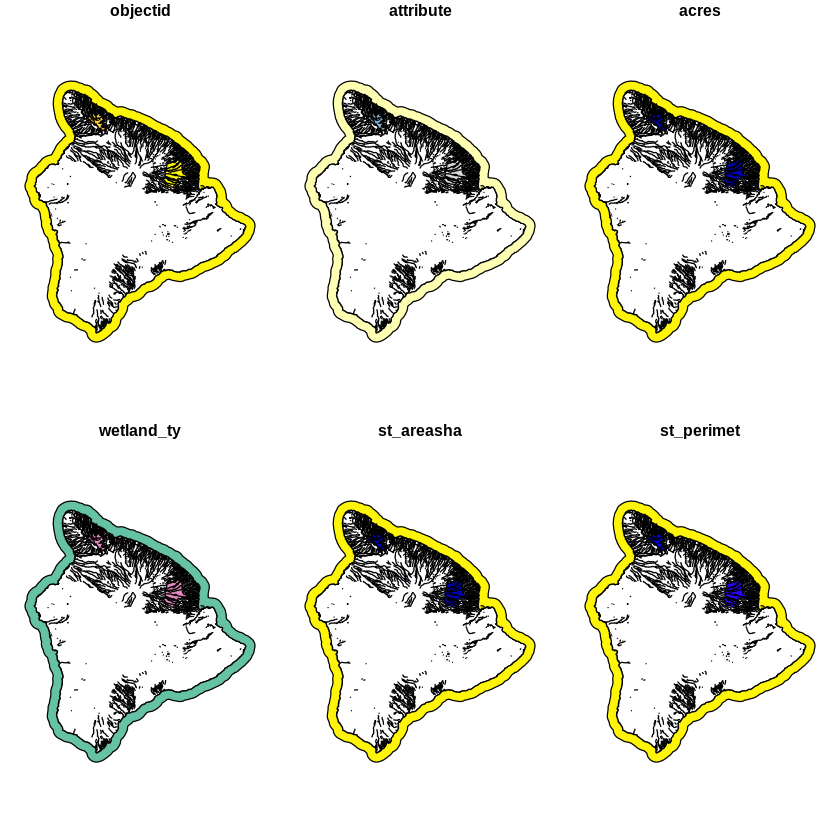

In [48]:
nwi_hawaii_gpkg %>%  plot

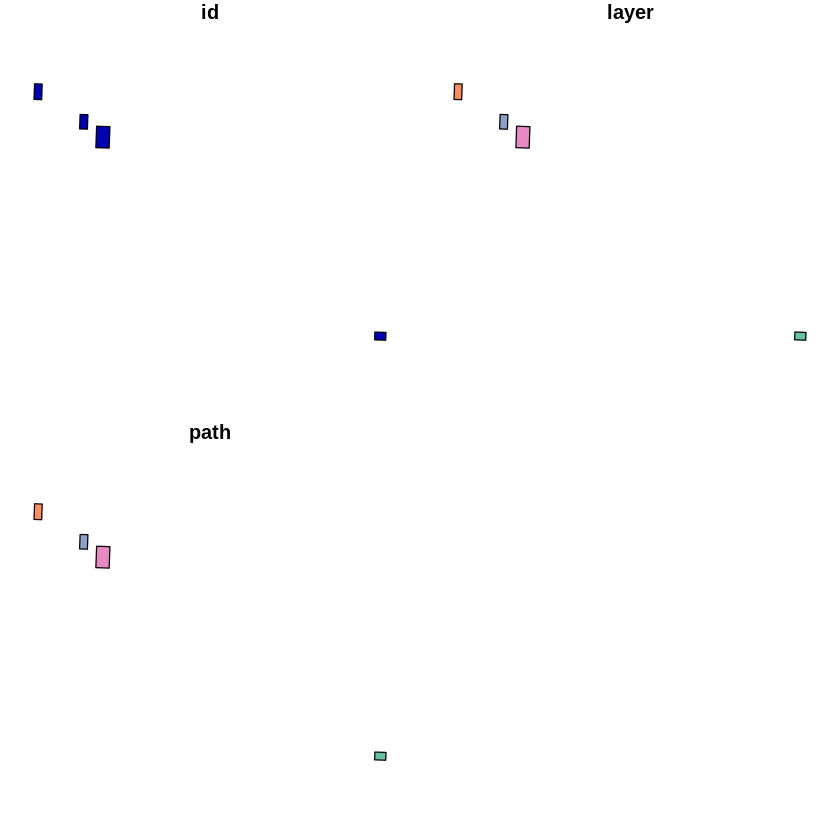

In [46]:
wetlands_hawaii_gpkg %>%  plot

In [59]:
wetlands_hawaii_gpkg$layer %>%  table

.
lokoaka_kionakapahu              pololu             waimanu              waipio 
                  1                   1                   1                   1 

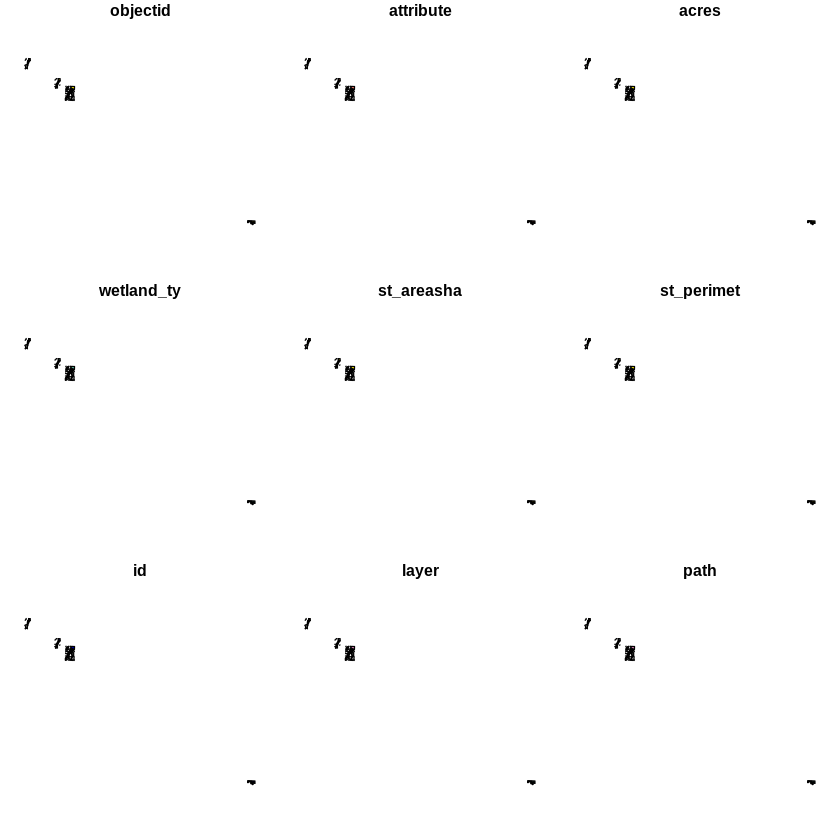

In [49]:
Nwi_Wetlands_hawaii_intersection %>%  plot

In [52]:
Nwi_Wetlands_hawaii_intersection$wetland_ty %>% table

.
   Estuarine and Marine Deepwater      Estuarine and Marine Wetland 
                                6                                11 
      Freshwater Emergent Wetland Freshwater Forested/Shrub Wetland 
                               22                                12 
                  Freshwater Pond                          Riverine 
                                4                                45 

In [57]:
Nwi_Wetlands_hawaii_intersection$layer %>% table

.
lokoaka_kionakapahu              pololu             waimanu              waipio 
                 10                  17                  15                  58 

In [ ]:
Nwi_Wetlands_hawaii_intersection$wetland_ty %>% table

In [12]:
dir.create('extracted_data')

In [86]:
# Nwi_Wetlands_intersection %>% st_write("/content/extracted_data/Nwi_Wetlands_intersection.gpkg", driver = "GPKG")
# Nwi_Wetlands_hawaii_intersection %>% st_write("/content/extracted_data/Nwi_Wetlands_hawaii_intersection.gpkg", driver = "GPKG")

Writing layer `Nwi_Wetlands_hawaii_intersection' to data source 
  `/content/extracted_data/Nwi_Wetlands_hawaii_intersection.gpkg' using driver `GPKG'
Writing 100 features with 12 fields and geometry type Unknown (any).


In [22]:
dir.create('/content/hawaii_data/planet')

In [ ]:
# https://drive.google.com/drive/folders/1wcc5PdfUOzsWyrGywUamY3m--44OJl16?usp=drive_link
      # Drive/DeepLearning_Project/Datasets/planet_hawaii folder


cl <- makeCluster(8)
jp_folder = "1wcc5PdfUOzsWyrGywUamY3m--44OJl16"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/hawaii_data/planet/', i_dir$name[1])
      )
    })
  }
stopCluster(cl)

In [25]:
planet_hawaii_gpkg <-
"/content/hawaii_data/planet" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [ ]:
planet_hawaii_gpkg

In [56]:
# planet_hawaii_gpkg %>% st_write("/content/extracted_data/planet_hawaii.gpkg", driver = "GPKG")

Writing layer `planet' to data source 
  `/content/extracted_data/planet.gpkg' using driver `GPKG'
Writing 299 features with 1 fields and geometry type Polygon.


In [27]:
dir.create('/content/hawaii_data/dem')

In [28]:
# https://drive.google.com/drive/folders/1i69kpClo2wDtemgit45ay3oogQXReg62?usp=drive_link
# hawaii island dem

#folder link to id
jp_folder = "1i69kpClo2wDtemgit45ay3oogQXReg62"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
#find files in folder
files = drive_ls(folder_id)

#loop dirs and download files inside them
for (i in seq_along(files$name)) {

  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/hawaii_data/dem/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 dem_hawaii 1i69kpClo2wDtemgit45ay3oogQXReg62 <named list [34]>


File downloaded:

• hawaii_10m.tif <id: 1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft>

Saved locally as:

• /content/hawaii_data/dem/hawaii_10m.tif



In [29]:
dem_hawaii_gpkg <-
"/content/hawaii_data/dem" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [ ]:
dem_hawaii_gpkg

In [31]:
dir.create('/content/hawaii_data/ccap')

In [ ]:
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
# hawaii island ccap

#folder link to id
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
#find files in folder
files = drive_ls(folder_id)

#loop dirs and download files inside them
for (i in seq_along(files$name)) {

  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/hawaii_data/ccap/', i_dir$name[1])
      )
    })
  }

In [33]:
ccap_hawaii_gpkg <-
"/content/hawaii_data/ccap" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [ ]:
ccap_hawaii_gpkg

In [74]:
Nwi_Wetlands_hawaii_intersection$wetland_ty %>% unique%>% length

[1] 6

In [85]:
dir.create('input_data')
# https://drive.google.com/file/d/1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS/view?usp=drive_link
drive_download(file = as_id('1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS'), path =  '/content/input_data/naip_index.zip', overwrite = FALSE)
unzip(zipfile ='/content/input_data/naip_index.zip', exdir = "/content/input_data/naip_index/")

Auto-refreshing stale OAuth token.

File downloaded:

• tileindex_HI_NAIP_2021.zip <id: 1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS>

Saved locally as:

• /content/input_data/naip_index.zip



In [ ]:
naip_hawaii_gpkg$url %>% unique%>% table

In [98]:
dir.create('/content/hawaii_data/naip')

In [99]:
cl <- makeCluster(8)

# Export naip_hawaii_gpkg to each worker
clusterExport(cl, "naip_hawaii_gpkg")

# Use parLapply to download files in parallel
parLapply(cl, 1:nrow(naip_hawaii_gpkg), function(x, naip_hawaii_gpkg) {
  x_dt <- naip_hawaii_gpkg[x,]
  tryCatch({
    download.file(x_dt$url, paste0('/content/hawaii_data/naip/', x_dt$location))
  }, error = function(e) {
    cat("Error downloading file:", x_dt$url, "\nError message:", e$message, "\n")
  })
}, naip_hawaii_gpkg)

# Stop the cluster after operations are complete
stopCluster(cl)

In [100]:
stopCluster(cl)

In [102]:
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26905.vrt', paste('/content/hawaii_data/naip/HI_NAIP_2021_EPSG-26905.vrt',sep=''))

In [103]:
hawaii_naip <- stack('/content/hawaii_data/naip/HI_NAIP_2021_EPSG-26905.vrt')

In [ ]:
hawaii_naip %>% st_crs # +proj=utm +zone=5 +datum=NAD83 +units=m +no_defs  wkt PROJCRS["unknown",BASEGEOGCRS["unknown",DATUM["North American Datum 1983",

In [ ]:
nlcd_hawaii_tif

nwi_hawaii_gpkg
wetlands_hawaii_gpkg
Nwi_Wetlands_hawaii_intersection #  <- st_intersection(nwi_hawaii_gpkg, wetlands_hawaii_gpkg)

planet_hawaii_gpkg
dem_hawaii_gpkg
ccap_hawaii_gpkg
naip_hawaii_gpkg

hawaii_naip

In [105]:
# wetlands_sample <- wetlands_gpkg[1,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
wetlands_sample <- wetlands_hawaii_gpkg[1,] %>% crop(hawaii_naip,.)

In [ ]:
wetlands_sample
wetlands_sample %>% st_crs

In [107]:
# wetlands_fishnet_gpkg <- wetlands_gpkg[1,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
wetlands_fishnet_gpkg <- wetlands_hawaii_gpkg[1,]  %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf

In [126]:
wetlands_fishnet_gpkg <- wetlands_hawaii_gpkg[1,]  %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf

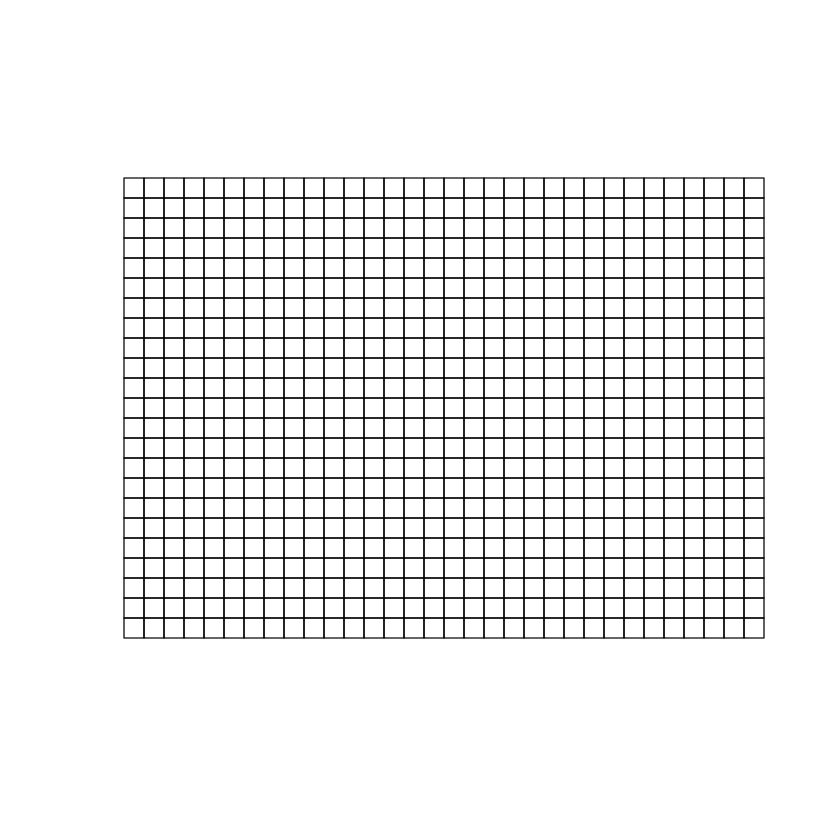

In [127]:
wetlands_fishnet_gpkg %>% plot

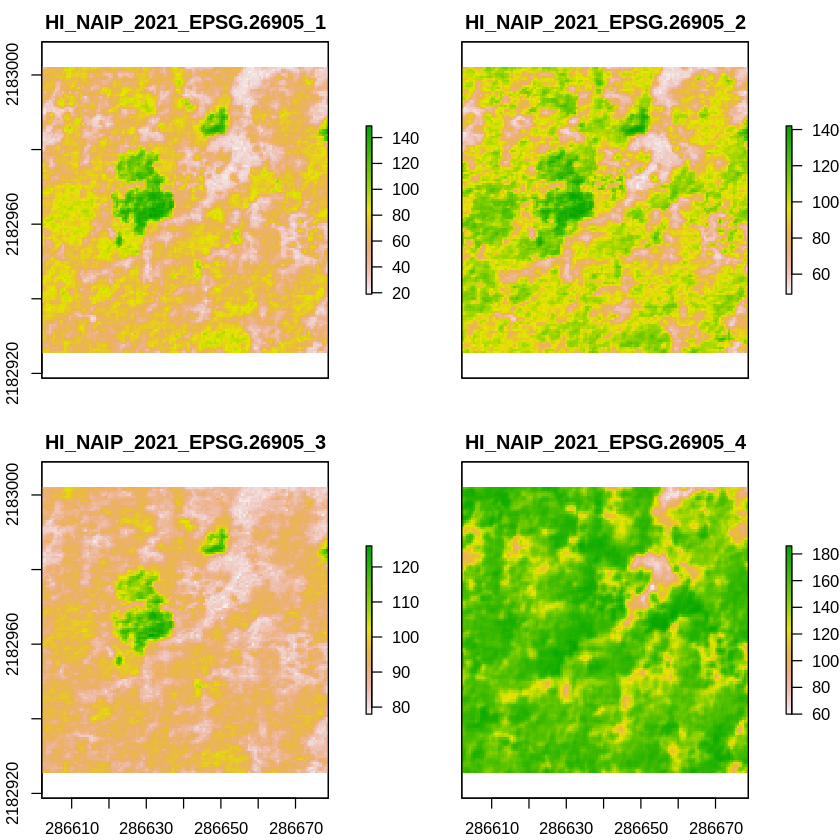

In [130]:
# wetlands_fishnet_sample <- wetlands_fishnet_gpkg[1,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)%>% plot
wetlands_fishnet_sample <- wetlands_fishnet_gpkg[300,]  %>% crop(wetlands_sample,.)%>% plot

In [ ]:
1:nrow(wetlands_hawaii_gpkg) %>% lapply(function(y){wetlands_sample<- wetlands_hawaii_gpkg[y,] %>% crop(hawaii_naip,.)
dem_loc_gpkg <- dem_hawaii_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_hawaii_gpkg[y,])) %>% st_intersection(wetlands_hawaii_gpkg[y,])})

In [132]:

dem_load_tif <- dem_loc_gpkg$


wetlands_sample <- wetlands_hawaii_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)


ERROR: Error in .local(x, y, ...): Cannot get an Extent object from argument y


In [58]:
# dem_hawaii_gpkg %>% st_write("/content/extracted_data/dem_hawaii_gpkg.gpkg", driver = "GPKG")

Writing layer `dem_gpkg' to data source 
  `/content/extracted_data/dem_gpkg.gpkg' using driver `GPKG'
Writing 5 features with 1 fields and geometry type Polygon.


In [60]:
# library(raster)

# Define the source folder
source_folder <- "/content/input_data/planet_hawaii/"

# Get a list of all files in the source folder that match the pattern
file_names <- list.files(source_folder, full.names = TRUE)

# Create an empty list to store the stacks
stacks <- list()

# Iterate over each unique file name pattern
unique_names <- unique(gsub("^.*?([^/]+)_.*$", "\\1", file_names))
for (name in unique_names) {
  # Get all files with the same name pattern
  files <- file_names[grep(paste0("^.*?", name, "_.*$"), file_names)]

  # Stack the files together
  stack_obj <- stack(files)

  # Add the stack to the list
  stacks[[name]] <- stack_obj
}

# Access the stacked raster stacks
# For example, to access the stack for 'anahola'
# anahola_stack <- stacks[["anahola"]]


In [159]:
library(raster)

# Define the source folder
source_folder <- "/content/input_data/Planet/"

# Get a list of all files in the source folder that match the pattern
file_names <- list.files(source_folder, full.names = TRUE)

# Create an empty list to store the stacks
stacks <- list()

# Iterate over each unique file name pattern
unique_names <- unique(gsub("^.*?([^/]+)_.*$", "\\1", file_names))
for (name in unique_names) {
  # Get all files with the same name pattern
  files <- file_names[grep(paste0("^.*?", name, "_.*$"), file_names)]

  # Create an empty list to store the raster objects
  rasters <- list()

  # Check the extent of each raster file
  for (file in files) {
    raster_obj <- raster(file)
    rasters[[file]] <- raster_obj

    # Check if the extent matches the first raster file's extent
    if (length(rasters) > 1) {
      if (!compareRaster(rasters)) {
        stop("Different extent: ", file)
      }
    }
  }

  # Stack the raster files together
  stack_obj <- stack(rasters)

  # Add the stack to the list
  stacks[[name]] <- stack_obj
}


ERROR: Error in compareRaster(rasters): different extent


In [74]:
lokoaka_kionakapahu_stack <- stacks[["lokoaka_kionakapahu"]]
lokoaka_kionakapahu_stack

class      : RasterStack 
dimensions : 582, 808, 470256, 76  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 285756, 288180, 2182233, 2183979  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : lokoaka_k//.01.29_1.1, lokoaka_k//.01.29_1.2, lokoaka_k//.01.29_1.3, lokoaka_k//.01.29_1.4, lokoaka_k//.02.11_1.1, lokoaka_k//.02.11_1.2, lokoaka_k//.02.11_1.3, lokoaka_k//.02.11_1.4, lokoaka_k//.06.30_1.1, lokoaka_k//.06.30_1.2, lokoaka_k//.06.30_1.3, lokoaka_k//.06.30_1.4, lokoaka_k//.07.05_1.1, lokoaka_k//.07.05_1.2, lokoaka_k//.07.05_1.3, ... 


In [73]:
pololu_stack <- stacks[["pololu"]]
pololu_stack

class      : RasterStack 
dimensions : 1131, 584, 660504, 88  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 213309, 215061, 2233392, 2236785  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : pololu_2018.01.10_1.1, pololu_2018.01.10_1.2, pololu_2018.01.10_1.3, pololu_2018.01.10_1.4, pololu_2018.06.22_1.1, pololu_2018.06.22_1.2, pololu_2018.06.22_1.3, pololu_2018.06.22_1.4, pololu_2018.08.31_1.1, pololu_2018.08.31_1.2, pololu_2018.08.31_1.3, pololu_2018.08.31_1.4, pololu_2018.09.19_1.1, pololu_2018.09.19_1.2, pololu_2018.09.19_1.3, ... 


In [140]:
waipio_stack <- stacks[["waipio"]]
waipio_stack

class      : RasterStack 
dimensions : 1555, 1000, 1555000, 60  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 226464, 229464, 2223090, 2227755  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : waipio_2018.01.09_1.1, waipio_2018.01.09_1.2, waipio_2018.01.09_1.3, waipio_2018.01.09_1.4, waipio_2018.02.06_1.1, waipio_2018.02.06_1.2, waipio_2018.02.06_1.3, waipio_2018.02.06_1.4, waipio_2018.09.19_1.1, waipio_2018.09.19_1.2, waipio_2018.09.19_1.3, waipio_2018.09.19_1.4, waipio_2018.10.01_1.1, waipio_2018.10.01_1.2, waipio_2018.10.01_1.3, ... 


class      : RasterStack 
dimensions : 1049, 592, 621008, 56  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 223005, 224781, 2227116, 2230263  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
names      : waimanu_2018.03.15_1.1, waimanu_2018.03.15_1.2, waimanu_2018.03.15_1.3, waimanu_2018.03.15_1.4, waimanu_2018.07.20_1.1, waimanu_2018.07.20_1.2, waimanu_2018.07.20_1.3, waimanu_2018.07.20_1.4, waimanu_2018.09.19_1.1, waimanu_2018.09.19_1.2, waimanu_2018.09.19_1.3, waimanu_2018.09.19_1.4, waimanu_2018.10.01_1.1, waimanu_2018.10.01_1.2, waimanu_2018.10.01_1.3, ... 


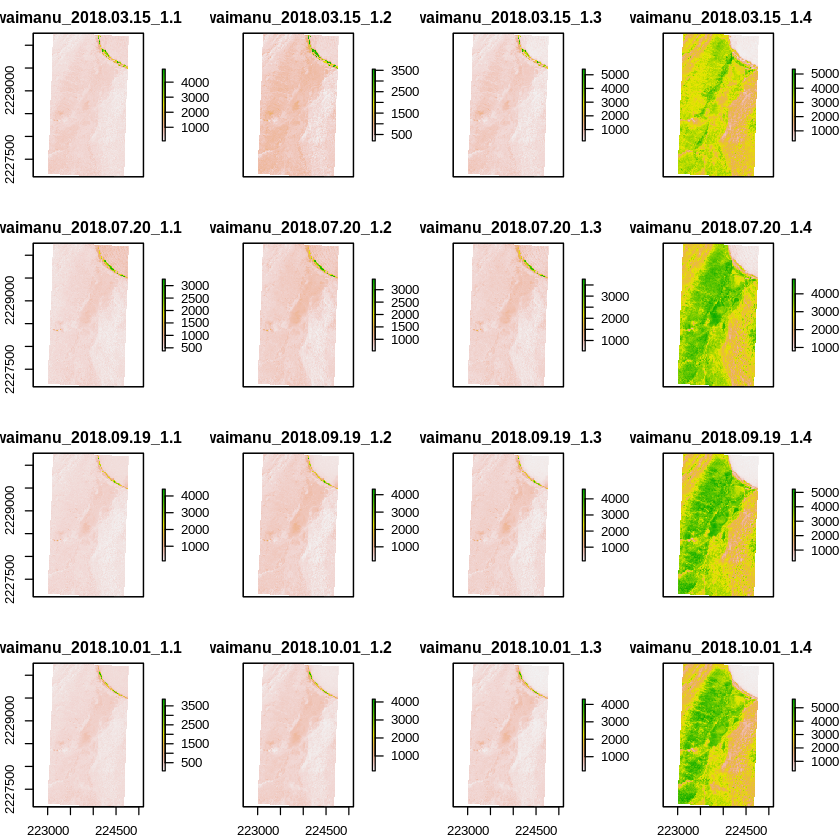

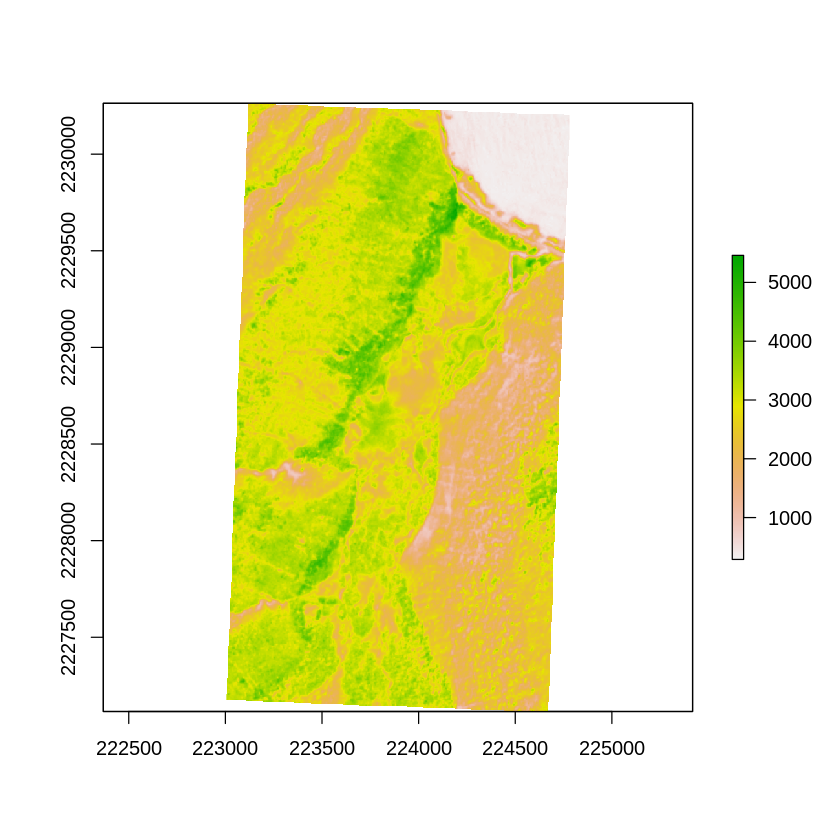

In [76]:
waimanu_stack <- stacks[["waimanu"]]
waimanu_stack
waimanu_stack %>% plot
waimanu_stack [[4]] %>% plot

In [ ]:
wetland_pololu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(pololu_stack,.)
wetland_pololu_stack
# wetland_pololu_stack %>% plot
fishent_128_wetland_pololu_stack <- wetland_pololu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_wetland_pololu_stack %>% plot
# fishent_128_wetland_pololu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_pololu_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_lokoaka_kionakapahu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(lokoaka_kionakapahu_stack,.)
wetland_lokoaka_kionakapahu_stack
# wetland_lokoaka_kionakapahu_stack %>% plot
fishent_128_wetland_lokoaka_kionakapahu_stack <- wetland_lokoaka_kionakapahu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_lokoaka_kionakapahu_stack %>% plot
# fishent_128_wetland_lokoaka_kionakapahu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_lokoaka_kionakapahu_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_waipio_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(waipio_stack,.)
wetland_waipio_stack
# wetland_lokoaka_kionakapahu_stack %>% plot
fishent_128_wetland_waipio_stack <- wetland_waipio_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_waipio_stack %>% plot
# fishent_128_wetland_waipio_stack %>% st_write("/content/extracted_data/fishent_128_wetland_waipio_stack.gpkg", driver = "GPKG")

In [ ]:
wetland_waimanu_stack <- Nwi_Wetlands_hawaii_intersection %>% crop(waimanu_stack,.)
wetland_waimanu_stack
# wetland_waimanu_stack %>% plot
fishent_128_wetland_waimanu_stack <- wetland_waimanu_stack %>% st_make_grid(cellsize = c(128, 128))%>% st_as_sf
# fishent_128_wetland_waimanu_stack %>% plot
# fishent_128_wetland_waimanu_stack %>% st_write("/content/extracted_data/fishent_128_wetland_waimanu_stack.gpkg", driver = "GPKG")

In [156]:
wetland_lokoaka_kionakapahu_stack

class      : RasterBrick 
dimensions : 430, 807, 347010, 76  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 285756, 288177, 2182689, 2183979  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : lokoaka_k//.01.29_1.1, lokoaka_k//.01.29_1.2, lokoaka_k//.01.29_1.3, lokoaka_k//.01.29_1.4, lokoaka_k//.02.11_1.1, lokoaka_k//.02.11_1.2, lokoaka_k//.02.11_1.3, lokoaka_k//.02.11_1.4, lokoaka_k//.06.30_1.1, lokoaka_k//.06.30_1.2, lokoaka_k//.06.30_1.3, lokoaka_k//.06.30_1.4, lokoaka_k//.07.05_1.1, lokoaka_k//.07.05_1.2, lokoaka_k//.07.05_1.3, ... 
min values :                     9,                   206,                   159,                   292,                   171,                   257,                   162,                   316,                    22,                   185,                   118,                   163,                   244,                   364,                   296, ... 
max

In [77]:
wetland_sample <- Wetlands_wgs84_utm[1,]

In [ ]:
Wetlands_wgs84_utm

In [93]:
wetland_sample <- wetlands_hawaii_gpkg[2,]

In [ ]:
wetland_sample

In [105]:
wetland_example <- wetlands_hawaii_gpkg %>% crop(pololu_stack,.)

In [106]:
wetland_example

class      : RasterBrick 
dimensions : 1130, 583, 658790, 88  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 213312, 215061, 2233392, 2236782  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : pololu_2018.01.10_1.1, pololu_2018.01.10_1.2, pololu_2018.01.10_1.3, pololu_2018.01.10_1.4, pololu_2018.06.22_1.1, pololu_2018.06.22_1.2, pololu_2018.06.22_1.3, pololu_2018.06.22_1.4, pololu_2018.08.31_1.1, pololu_2018.08.31_1.2, pololu_2018.08.31_1.3, pololu_2018.08.31_1.4, pololu_2018.09.19_1.1, pololu_2018.09.19_1.2, pololu_2018.09.19_1.3, ... 
min values :                     1,                    67,                    75,                   106,                   196,                   292,                   248,                   638,                   100,                   219,                   223,                   433,                   184,                   250,                   216, ... 
ma

In [ ]:
wetland_example_2
wetland_example_2 %>% plot

In [ ]:
wetlands_hawaii_gpkg
wetlands_hawaii_gpkg %>% plot

In [ ]:
# Nwi_Wetlands_hawaii_intersection
Nwi_Wetlands_hawaii_intersection %>% plot

In [ ]:
wetland_example %>% plot

In [ ]:
# # Define source and destination folders
# source_folder <- "/content/input_data/Planet/"
# destination_folder <- "/content/input_data/planet_hawaii/"

# # List of file names to move
# files_to_move <- c("lokoaka_kionakapahu_2019-01-24.tif", "lokoaka_kionakapahu_2019-08-07.tif", "lokoaka_kionakapahu_2019-10-30.tif", "lokoaka_kionakapahu_2019-12-07.tif",
# "lokoaka_kionakapahu_2020-02-04.tif", 'lokoaka_kionakapahu_2020-04-19.tif', "lokoaka_kionakapahu_2020-06-03.tif", "lokoaka_kionakapahu_2020-09-14.tif")

# # Iterate over each file name
# for (file_name in files_to_move) {
#   # Construct file paths
#   source_file <- file.path(source_folder, file_name)
#   destination_file <- file.path(destination_folder, file_name)

#   # Check if the file exists in the source folder
#   if (file.exists(source_file)) {
#     # Move the file to the destination folder
#     file.copy(source_file, destination_file, overwrite = TRUE)
#     print(paste("Moved file:", file_name))

#     # Remove the file from the source folder
#     file.remove(source_file)
#     print(paste("Removed file from source folder:", file_name))
#   } else {
#     print(paste("File not found:", file_name))
#   }
# }



# # Define source and destination folders
# source_folder <- "/content/input_data/Planet/"
# destination_folder <- "/content/input_data/planet_hawaii/"

# # Get a list of all files in the source folder that include the name "lokoaka_kionakapahu_"
# files_to_move <- list.files(source_folder, pattern = "waipio_", full.names = TRUE)

# # Iterate over each file to move
# for (source_file in files_to_move) {
#   # Extract the file name
#   file_name <- basename(source_file)

#   # Construct the destination file path
#   destination_file <- file.path(destination_folder, file_name)

#   # Move the file to the destination folder
#   file.copy(source_file, destination_file, overwrite = TRUE)
#   print(paste("Moved file:", file_name))

#   # Remove the file from the source folder
#   file.remove(source_file)
#   print(paste("Removed file from source folder:", file_name))
# }

# **OTHER**

In [ ]:
# https://drive.google.com/file/d/1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS/view?usp=drive_link
drive_download(file = as_id('1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS'), path =  '/content/input_data/naip_index.zip', overwrite = FALSE)

File downloaded:

• tileindex_HI_NAIP_2021.zip <id: 1thj0vGXN0xgXxI_XDY-hagp-gWHZCdaS>

Saved locally as:

• /content/input_data/naip_index.zip



In [ ]:
unzip(zipfile ='/content/input_data/naip_index.zip', exdir = "/content/input_data/naip_index/")

In [ ]:
# https://drive.google.com/file/d/1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF/view?usp=drive_link
drive_download(file = as_id('1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF'), path =  '/content/input_data/NWI_wetlands.gpkg', overwrite = TRUE)

File downloaded:

• NWI_wetlands.gpkg <id: 1ozE_Ldpio1LJaH2WS9r9hqRAIBDV8TDF>

Saved locally as:

• /content/input_data/NWI_wetlands.gpkg



In [ ]:
# https://drive.google.com/file/d/1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ/view?usp=drive_link
drive_download(file = as_id('1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ'), path =  '/content/input_data/wetlands.gpgk', overwrite = TRUE)

File downloaded:

• wetland_AOI.gpkg <id: 1cKHJ95tAkl0CSoNZkdO0w2wlaH6Wr_YZ>

Saved locally as:

• /content/input_data/wetlands.gpkg



In [ ]:
# https://drive.google.com/file/d/1foSde5txo6hPvWp4kcQF8We2WTDqDpYh/view?usp=drive_link
drive_download(file = as_id('1foSde5txo6hPvWp4kcQF8We2WTDqDpYh'), path =  '/content/input_data/nlcd_hi_2001', overwrite = TRUE)

Auto-refreshing stale OAuth token.

File downloaded:

• nlcd_hi_2001.tif <id: 1foSde5txo6hPvWp4kcQF8We2WTDqDpYh>

Saved locally as:

• /content/input_data/nlcd_hi_2001



In [ ]:
nlcd_tif <- raster('/content/input_data/nlcd_hi_2001')

In [ ]:
nwi_gpkg = st_read('/content/input_data/NWI_wetlands.gpkg')

Reading layer `NWI_wetlands' from data source 
  `/content/input_data/NWI_wetlands.gpkg' using driver `GPKG'
Simple feature collection with 13555 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -160.3031 ymin: 18.85975 xmax: -154.7531 ymax: 22.28533
Geodetic CRS:  WGS 84


In [ ]:
naip_index_gpkg = st_read('/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp')

Reading layer `tileindex_HI_NAIP_2021' from data source 
  `/content/input_data/naip_index/tileindex_HI_NAIP_2021.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 611 features and 3 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -160.3144 ymin: 18.8732 xmax: -154.7481 ymax: 22.25184
Geodetic CRS:  NAD83


In [ ]:
wetlands_gpkg = st_read('/content/input_data/wetlands.gpgk')

Warning message in CPL_read_ogr(dsn, layer, query, as.character(options), quiet, :
“GDAL Message 1: File /content/input_data/wetlands.gpgk has GPKG application_id, but non conformant file extension”


Reading layer `wetland_AOI' from data source `/content/input_data/wetlands.gpgk' using driver `GPKG'
Simple feature collection with 17 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 444046 ymin: 2185865 xmax: 917131.2 ymax: 2457336
Projected CRS: WGS 84 / UTM zone 4N


In [ ]:
# wetlands_gpkg %>% plot

In [ ]:
download_index_gpkg <- naip_index_gpkg %>% st_intersection(wetlands_gpkg %>% st_transform(st_crs(naip_index_gpkg)))

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [ ]:
download_index_gpkg$url %>% unique %>% length

[1] 48

In [ ]:
dir.create('HI_2021_NAIP')

In [ ]:
# dem_gpkg %>% st_as_sf %>% st_crs

In [ ]:
cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,download_index_gpkg){
  x_dt <- download_index_gpkg[x,]
  download.file(x_dt$url, paste('/content/HI_2021_NAIP/',x_dt$location,sep='') )
  },download_index_gpkg)
stopCluster(cl)

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

[[4]]
[1] 0

[[5]]
[1] 0

[[6]]
[1] 0

[[7]]
[1] 0

[[8]]
[1] 0

[[9]]
[1] 0

[[10]]
[1] 0

[[11]]
[1] 0

[[12]]
[1] 0

[[13]]
[1] 0

[[14]]
[1] 0

[[15]]
[1] 0

[[16]]
[1] 0

[[17]]
[1] 0

[[18]]
[1] 0

[[19]]
[1] 0

[[20]]
[1] 0

[[21]]
[1] 0

[[22]]
[1] 0

[[23]]
[1] 0

[[24]]
[1] 0

[[25]]
[1] 0

[[26]]
[1] 0

[[27]]
[1] 0

[[28]]
[1] 0

[[29]]
[1] 0

[[30]]
[1] 0

[[31]]
[1] 0

[[32]]
[1] 0

[[33]]
[1] 0

[[34]]
[1] 0

[[35]]
[1] 0

[[36]]
[1] 0

[[37]]
[1] 0

[[38]]
[1] 0

[[39]]
[1] 0

[[40]]
[1] 0

[[41]]
[1] 0

[[42]]
[1] 0

[[43]]
[1] 0

[[44]]
[1] 0

[[45]]
[1] 0

[[46]]
[1] 0

[[47]]
[1] 0

[[48]]
[1] 0

[[49]]
[1] 0

[[50]]
[1] 0

[[51]]
[1] 0

[[52]]
[1] 0

[[53]]
[1] 0

[[54]]
[1] 0

[[55]]
[1] 0

In [ ]:
download.file('https://coast.noaa.gov/htdata/raster7/imagery/HI_NAIP_2021_9668/HI_NAIP_2021_EPSG-26904.vrt', paste('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt',sep=''))

In [ ]:
hawaii_naip <- stack('/content/HI_2021_NAIP/HI_NAIP_2021_EPSG-26904.vrt')

In [ ]:
dir.create('output_fishnets')

In [ ]:
1:nrow(wetlands_gpkg) %>%
  lapply(function(y){
wetlands_sample <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(hawaii_naip,.)
dem_loc_gpkg <- dem_gpkg %>% st_as_sf %>% st_transform(st_crs(wetlands_gpkg[y,])) %>% st_intersection(wetlands_gpkg[y,])
dem_load_tif <- dem_loc_gpkg$path %>% raster %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(dem_load_tif)))
nlcd_load_tif <- nlcd_tif %>% crop(., wetlands_fishnnet_gpkg[y,] %>% st_transform(st_crs(nlcd_tif)))
wetlands_fishnnet_gpkg <- wetlands_gpkg[y,] %>% st_transform(st_crs(hawaii_naip)) %>% st_make_grid(cellsize =c(76.8,76.8)) %>% st_as_sf
# file.remove(paste0('/content/output_fishnets/',wetlands_sample$layer[1],'.gpkg'))
st_write(wetlands_fishnnet_gpkg,paste0('/content/output_fishnets/',wetlands_gpkg$layer[y],'.gpkg'),delete_dsn=T,delete_layer = T)

cl <- makeCluster(8)
1:nrow(download_index_gpkg) %>%
  parLapply(cl,.,function(x,wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,nlcd_load_tif,nwi_gpkg){

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
sample_chip <- wetlands_fishnnet_gpkg[x,] %>% st_transform(st_crs(hawaii_naip)) %>% crop(wetlands_sample,.)
sample_chip$dem <- projectRaster(dem_load_tif, sample_chip, method="ngb")
sample_chip$nlcd <- projectRaster(nlcd_load_tif, sample_chip, method="ngb")
nwi_gpkg$wetland_ty <- nwi_gpkg$wetland_ty %>% as.factor
nwi_gpkg <- nwi_gpkg %>% st_transform(st_crs(sample_chip))
sample_chip$class <- fasterize(
nwi_gpkg,
sample_chip[[1]],
field = 'wetland_ty',
fun = "first")
sample_chip$class_fill <-sample_chip$class
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- values(sample_chip$nlcd)[is.na(values(sample_chip$class_fill))]
values(sample_chip$class_fill)[is.na(values(sample_chip$class_fill))] <- 0
values(sample_chip$dem)[is.na(values(sample_chip$dem))] <- 0
values(sample_chip$nlcd)[is.na(values(sample_chip$nlcd))] <- 0
values(sample_chip$class)[is.na(values(sample_chip$class))] <- 0
sample_chip  %>% writeRaster(paste0('output_chips/',(sample_chip %>% extent %>% round)[1],'_',(sample_chip %>% extent %>% round)[3],'.tif'),overwrite=T)

  },wetlands_fishnnet_gpkg,hawaii_naip,wetlands_sample,dem_load_tif,nlcd_load_tif,nwi_gpkg)
stopCluster(cl)
  })

Deleting source `/content/output_fishnets/anahola.gpkg' using driver `GPKG'
Writing layer `anahola' to data source 
  `/content/output_fishnets/anahola.gpkg' using driver `GPKG'
Writing 1080 features with 0 fields and geometry type Polygon.


ERROR: Error in .local(x, y, ...): extents do not overlap


In [ ]:
zip(zipfile = 'testZip', files = 'testDir/test.csv') #make this work

In [ ]:
#put code here to upload to drive